<a href="https://colab.research.google.com/github/alokbhoi447/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>



*   **id ->** reference number of the rental property/apartment assigned by Airbnb
*  **name ->** name of apartment or house 
*  **host id ->** reference number of the host or the ownwer of the property
*   **host name ->** Name of the host or owner of the apartment
*  **neighbourhood group ->** Name of the group of neighbourhoods
* **neighbourhood ->** Name of the neighbourhod
* **latitude ->** latitude of the location of the apartment
* **longitude ->** longitude of the location of the apartment
* **room type ->** type of room that the apartment provides to rent
* **price ->** price of the room/apartment 
* **minimum nights ->** number of minimum nights a customer has to book to rent the room/apartment
* **number of reviews ->** number of total reviews the apartment/property has received
* **last reveiw ->** the last date in which the apartment received a review
* **reveiws per month ->** Average how many reviews the apartment gets
* **calculated host listing ->** 
* **avalilability_365 ->**







In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ALMABETTER/MODULE 2/EDA/Copy of Airbnb NYC 2019.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [106]:
df[df['minimum_nights']=='NaN']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


# **Number of Hotels in each neighbourhood group**

In [92]:
hotels_neighbourhood_group= df.groupby(['neighbourhood_group'])['neighbourhood'].count()

In [93]:
hotels_neighbourhood_group

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

Text(0.5, 0, 'Neighbourhood group')

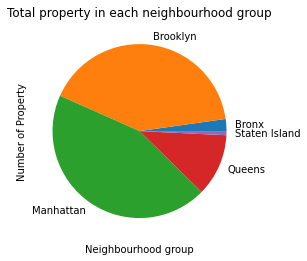

In [ ]:
hotels_neighbourhood_group.plot(kind='pie')
plt.title('Total property in each neighbourhood group')
plt.ylabel('Number of Property')
plt.xlabel('Neighbourhood group')


# **Top 10 host**

In [ ]:
top_10_host = df.groupby(['host_id','host_name'])['host_name'].count().sort_values(ascending=False).head(10)
top_10_host

host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
12243051   Sonder                96
16098958   Jeremy & Laura        96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
7503643    Vida                  52
Name: host_name, dtype: int64

Text(0.5, 0, 'Number of property')

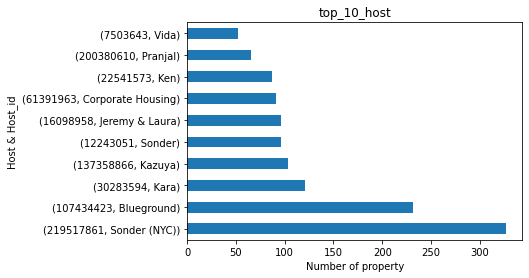

In [ ]:
top_10_host.plot(kind = 'barh')

plt.title('top_10_host')
plt.ylabel('Host & Host_id')
plt.xlabel('Number of property')

# **Number of neighbourhoods in each neighborhood group**

In [ ]:
number_of_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].count()
number_of_neighbourhood

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

Text(0.5, 0, 'Neighbourhood_group')

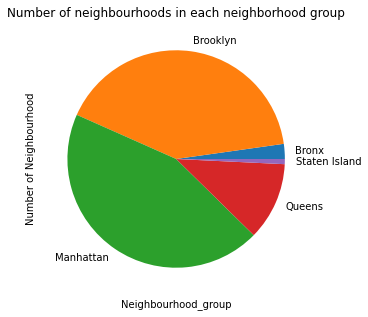

In [ ]:
number_of_neighbourhood.plot(kind = 'pie',figsize=(5,5))

plt.title('Number of neighbourhoods in each neighborhood group')
plt.ylabel('Number of Neighbourhood')
plt.xlabel('Neighbourhood_group')


# **Number of rooms by different room types in each neighbourhood group**

In [ ]:
room_type = df.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack('room_type')
room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


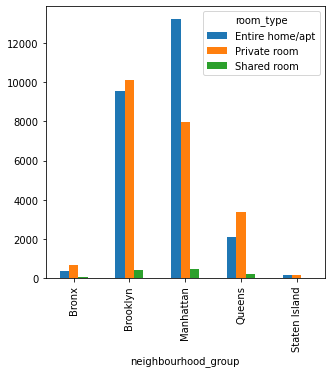

In [74]:
#df2 = modified_df1.groupby(['business_postal_code','risk_category'])['business_postal_code'].count().unstack('risk_category')
room_type[['Entire home/apt','Private room','Shared room']].plot(kind='bar',figsize=(5,5))

# **Average price for different room types**

In [81]:
room_type_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
room_type_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [ ]:
avg_room_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean()

In [ ]:
# df['Month']= df['last_review'][:7]
# df['Month'].value_counts()

**Hotels where maximum night stayed**

In [ ]:
minimum_nights_stayed = df.groupby('name')['minimum_nights'].sum().sort_values(ascending = False).head(10)
minimum_nights_stayed

name
Prime W. Village location 1 bdrm       1250
Beautiful place in Brooklyn! #2         999
Historic Designer 2 Bed. Apartment      999
Shared Studio (females only)            999
Williamsburg Apartment                  508
Peaceful apartment close to F/G         500
Beautiful Fully Furnished 1 bed/bth     500
Wonderful Large 1 bedroom               500
Zen Room in Crown Heights Brooklyn      500
Brand New Luxury Apt Lease Takeover     480
Name: minimum_nights, dtype: int64

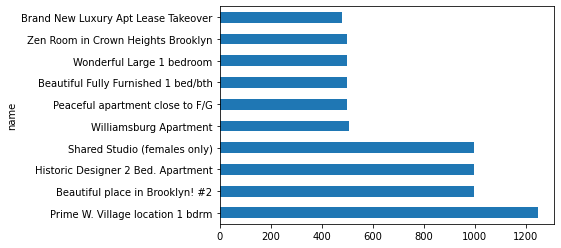

In [ ]:
minimum_nights_stayed.plot(kind='barh')

In [89]:
df.groupby(['neighbourhood_group','room_type'])['price'].describe()

count        mean  ...     75%      max
neighbourhood_group room_type                             ...                 
Bronx               Entire home/apt    379.0  127.506596  ...  140.00   1000.0
                    Private room       652.0   66.788344  ...   70.00   2500.0
                    Shared room         60.0   59.800000  ...   55.50    800.0
Brooklyn            Entire home/apt   9559.0  178.327545  ...  199.00  10000.0
                    Private room     10132.0   76.500099  ...   80.00   7500.0
                    Shared room        413.0   50.527845  ...   50.00    725.0
Manhattan           Entire home/apt  13199.0  249.239109  ...  259.00  10000.0
                    Private room      7982.0  116.776622  ...  120.00   9999.0
                    Shared room        480.0   88.977083  ...   89.25   1000.0
Queens              Entire home/apt   2096.0  147.050573  ...  168.25   2600.0
                    Private room      3372.0   71.762456  ...   75.00  10000.0
                    Shared room        198.0   69.020202  ...   54.25   1800.0
Staten Island       Entire home/apt    176.0  173.846591  ...  151.25   5000.0
                    Private room       188.0   62.292553  ...   75.00    300.0
                    Shared room          9.0   57.444444  ...   75.00    150.0

[15 rows x 8 columns]

# **Hotel/Apartment with maximum number of reviews**

In [100]:
df.groupby(['name','neighbourhood_group'])['number_of_reviews'].sum().sort_values(ascending=False)

name                                                neighbourhood_group
Private Bedroom in Manhattan                        Manhattan              666
Room near JFK Queen Bed                             Queens                 629
Beautiful Bedroom in Manhattan                      Manhattan              617
Great Bedroom in Manhattan                          Manhattan              607
Room Near JFK Twin Beds                             Queens                 576
                                                                          ... 
Historic Manhattan Home to make your stay special!  Manhattan                0
Historic Jumel Terrace Manhattan                    Manhattan                0
Historic Greenwich Village apt.                     Manhattan                0
Historic Far Rockaway Beach Bungalow                Queens                   0
LUXURY 3BR IN MIDTOWN WEST NEAR COLUMBUS CIRCLE     Manhattan                0
Name: number_of_reviews, Length: 47996, dtype: int64